# Zufallszahlen generieren

In diesem Beispiel wollen wir Zufallszahlen von endlichen Verteilungen generieren.

---

### Gleichverteilung

Wir betrachten die Verteilung des Wurfs eines Würfels mit 6 Seiten. Der Ereignisraum ist

$$\Omega = \{1,2,3,4,5,6\}.$$

Wir nennen die Gleichverteilung auf $\Omega$ einen *fairen Würfel*. Das heisst:

$$P(\{1\}) = P(\{2\}) = P(\{3\}) = P(\{4\}) = P(\{5\}) = P(\{6\}) =  \frac{1}{\# \Omega} = \frac{1}{6}.$$

Die Wahrscheinlichkeitsverteilung eines fairen Würfels kann wie folgt visualisiert werden. Erst definieren wir `p` als Vektor der Wahrscheinlichkeiten.

In [9]:
Omega = 1:6
p = rep(1/6, 6) # ein Vektor der 6 mal 1/6 enthält (rep = repeat)
p

[1] 0.1666667 0.1666667 0.1666667 0.1666667 0.1666667 0.1666667

Dann plotten wir `p` gegen `Omega`. Hierbei fordert `expression` `R` auf das Argument in LaTeX zu rendern.

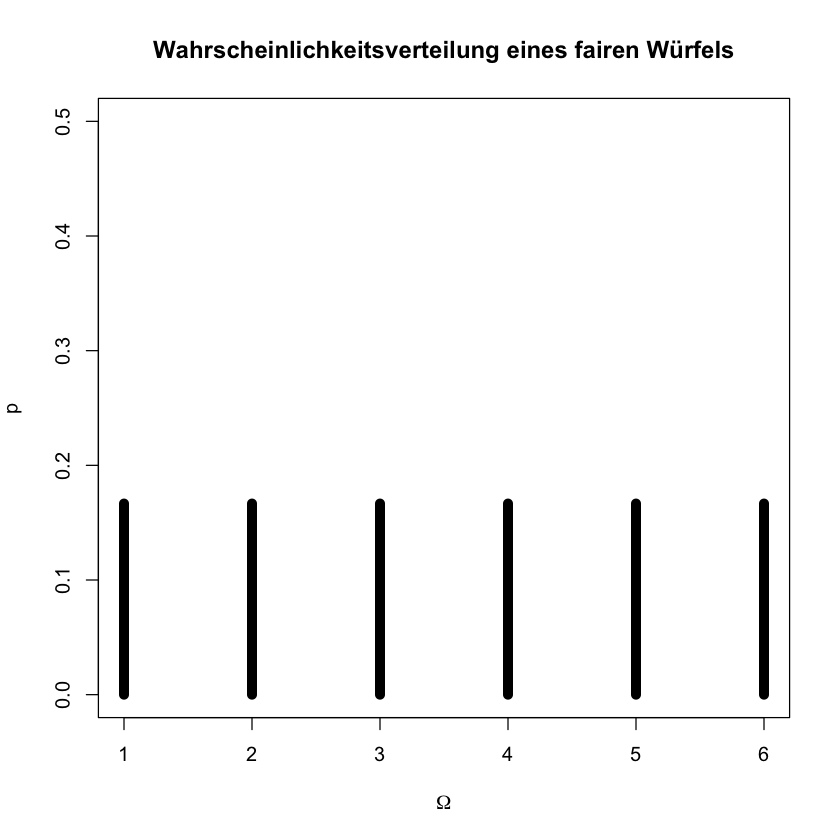

In [56]:
plot(Omega, p, type = "h", ylim=c(0,0.5), lwd=8, # lwd = linewidth
    xlab=expression(Omega), ylab=expression(p), 
    main="Wahrscheinlichkeitsverteilung eines fairen Würfels")

Eine Stichprobe `D` in `Omega` der Grösse $N=10000$ wird wie folgt gezogen.

In [38]:
D = sample(Omega, 10000, replace=TRUE, prob=p)

Jetzt plotten wir die Stichprobe `D`:

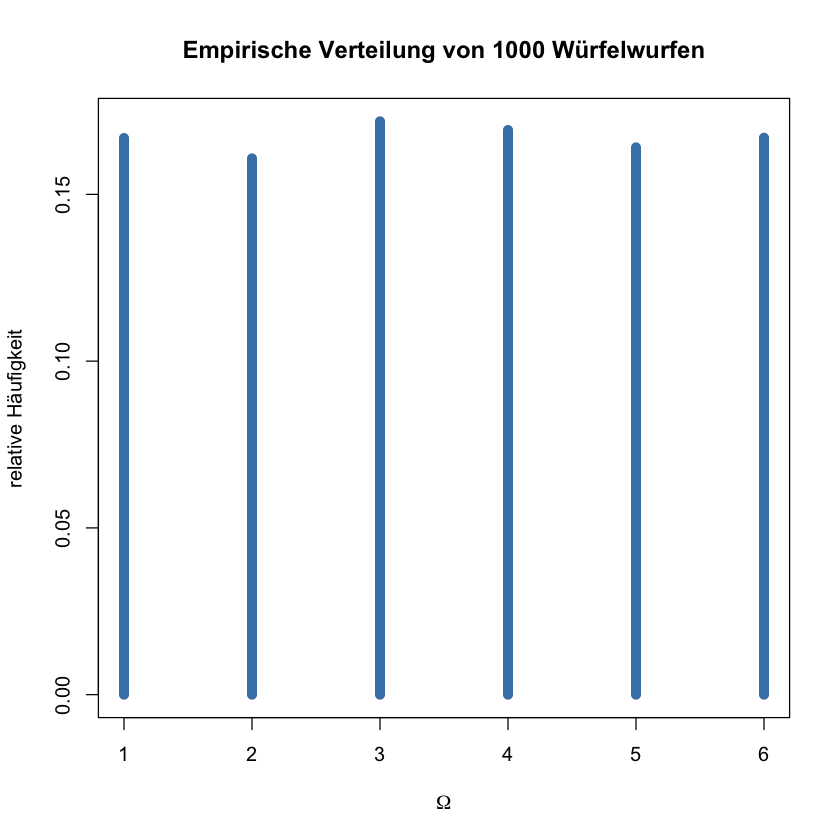

In [55]:
plot(table(D)/length(D), type="h", col = "steelblue", lwd=8, # lwd = linewidth
     xlab=expression(Omega),
     ylab="relative Häufigkeit", 
     main="Empirische Verteilung von 1000 Würfelwurfen")

### Schiefe Verteilung

Als nächstes betrachten wir eine Verteilung auf $\Omega$, die nicht die Gleichverteilung ist:

$$P(\{1\}) = P(\{2\}) = P(\{3\}) = P(\{4\}) = P(\{5\}) = \frac{1}{7} \quad \text{und} \quad P(\{6\}) =  \frac{2}{7}.$$

Wir nennen diese Veteilung *schief*. 

Wir nennen einen Würfel, dessen Seiten diese Wahrscheinlichkeiten haben, einen *gezinkten Würfel*.

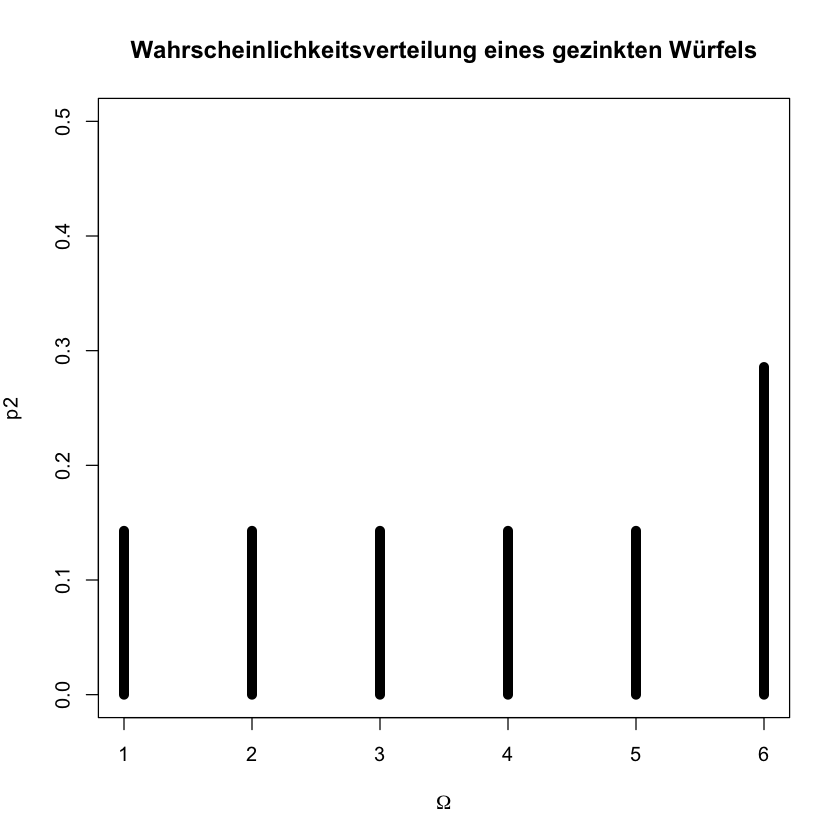

In [54]:
p2 <- c(1/7,1/7,1/7,1/7,1/7,2/7)

plot(Omega, p2, type = "h", ylim=c(0,0.5), lwd=8, # lwd = linewidth
    xlab=expression(Omega), ylab=expression(p2), 
    main="Wahrscheinlichkeitsverteilung eines gezinkten Würfels")

Jetzt ziehen wir eine Stichprobe der Grösse $N = 10000$ und plotten das Ergebnis. 

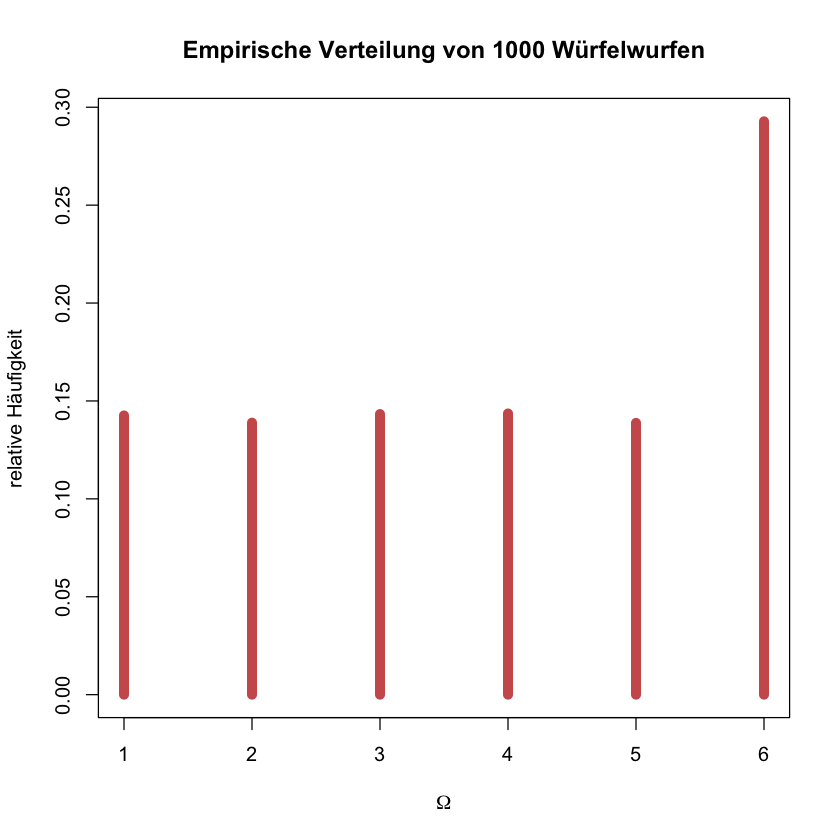

In [53]:
D2 = sample(Omega, 10000, replace=TRUE, prob=p2)

plot(table(D2)/length(D2), type="h", col = "indianred", lwd=8, # lwd = linewidth
     xlab=expression(Omega),
     ylab="relative Häufigkeit", 
     main="Empirische Verteilung von 1000 Würfelwurfen")

### Vergleich

Wir plotten beide empirischen Verteilungen als Vergleich.

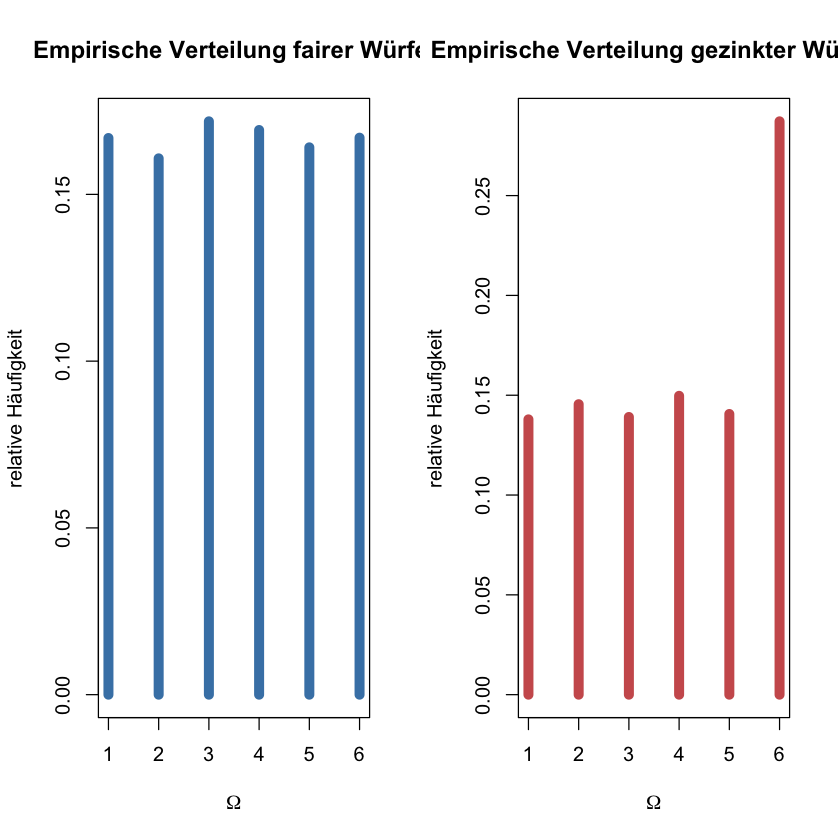

In [52]:
par(mfrow = c(1,2))
plot(table(D)/length(D), type="h", col = "steelblue", lwd=8, # lwd = linewidth
     xlab=expression(Omega),
     ylab="relative Häufigkeit", 
     main="Empirische Verteilung fairer Würfel")
plot(table(D2)/length(D2), type="h", col = "indianred", lwd=8, # lwd = linewidth
     xlab=expression(Omega),
     ylab="relative Häufigkeit", 
     main="Empirische Verteilung gezinkter Würfel")

---

## Urnenmodelle

Wir ziehen Stichproben vom Urnenmodell mit $n=15$ Kugeln und $k=10$ Ziehungen. 

In [90]:
n = 15
k = 10

### Mit Zurücklegen, mit Beachtung der Reihenfolge

Zunächst ziehen wir **eine** Beobachtung `x1` mit Zurücklegen und mit Beachtung der Reihenfolge:

In [97]:
x1 = sample(1:n, size=k, replace=TRUE)
x1

[1] 14  3  2  8  9 14 10  5  3 10

Die Anzahl der Möglichkeiten `x1` zu ziehen ist

In [101]:
n^k

[1] 576650390625

Das heisst, die Wahrscheinlichkeit `x1`zu ziehen, ist

In [106]:
1/n^k

[1] 1.734153e-12

### Mit Zurücklegen, mit Beachtung der Reihenfolge

Wir können den Datenpunkt sortieren, falls wir ihn ohne Reihenfolge betrachten wollen. 

In [110]:
x2 = sort(x1)

Die Anzahl der Möglichkeiten `x2` zu ziehen ist

In [105]:
choose(n+k-1, k)

[1] 1961256

Das heisst, die Wahrscheinlichkeit `x2` zu ziehen, ist

In [108]:
1/choose(n+k-1, k)

[1] 5.098773e-07

### Ohne Zurücklegen, ohne Beachtung der Reihenfolge

Jetzt ziehen wir **eine** Beobachtung `x3` ohne Zurücklegen und mit Beachtung der Reihenfolge:

In [111]:
x3 = sample(1:n, size=k, replace=FALSE)
x3

[1] 15  3 12  9  2 13  4  6  8 11

Die Anzahl Möglichkeiten `x3` zu ziehen ist $\frac{n!}{(n-k)!}$

In [112]:
factorial(n) / factorial(n-k)

[1] 10897286400

Das heisst, die Wahrscheinlichkeit `x3`zu ziehen ist

In [114]:
1 / (factorial(n) / factorial(n-k))

[1] 9.176596e-11

### Ohne Zurücklegen, mit Beachtung der Reihenfolge

Um `x3` ohne Reihenfolge zu betrachten, können wir es wieder sortieren.

In [116]:
x4 = sort(x3)
x4

[1]  2  3  4  6  8  9 11 12 13 15

Die Anzahl Möglichkeiten `x4` zu zieen ist

In [117]:
choose(n,k)

[1] 3003

Das heisst, die Wahrscheinlichkeit `x4`zu ziehen, ist

In [118]:
1/choose(n,k)

[1] 0.0003330003

---